## [Computational Photography](https://docs.opencv.org/3.4/d0/d07/tutorial_py_table_of_contents_photo.html)
In this section you will learn different computational photography techniques like image denoising etc.

Here you will learn different OpenCV functionalities related to Computational Photography like image denoising etc.

### [Image Denoising](https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html)
Non-Local Means Denoising이라는 이미지에서 노이즈를 제거하는 좋은 기술을 보십시오.

#### Goal
In this chapter,

* You will learn about Non-local Means Denoising algorithm to remove noise in the image.
* You will see different functions like [cv.fastNlMeansDenoising()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93), [cv.fastNlMeansDenoisingColored()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga03aa4189fc3e31dafd638d90de335617) etc.

#### Theory
이전 챕터에서는 Gaussian Blurring, Median Blurring 등과 같은 많은 이미지 평활화 기술을 보았으며 소량의 소음 제거에 어느 정도 효과적이었습니다. 이러한 기술에서 우리는 픽셀 주위에 작은 이웃을 가져 와서 중심 요소를 대체하기 위해 가우스 웨이팅 평균, 중앙값 등의 연산을 수행했습니다. 간략히 말하자면, 한 픽셀에서의 노이즈 제거는 그 근처에 국지적 이었습니다.

소음의 속성이 있습니다. 잡음은 일반적으로 평균이 0 인 무작위 변수로 간주됩니다. 시끄러운 픽셀, \\(p = p_0 + n \\)을 고려해보십시오. 여기서 \\(p_0\\)는 픽셀의 참값이고 n은 해당 픽셀의 노이즈입니다. 서로 다른 이미지에서 많은 수의 동일한 픽셀 (예 : N)을 취해 평균을 계산할 수 있습니다. 이상적으로, 잡음의 평균이 0이므로 \\(p = p_0\\)을 얻어야합니다.

간단한 설정으로 직접 확인할 수 있습니다. 몇 초 동안 고정 된 카메라를 특정 위치로 잡습니다. 이렇게하면 많은 장면이나 동일한 장면의 이미지를 얻을 수 있습니다. 그런 다음 비디오에있는 모든 프레임의 평균을 찾기위한 코드를 작성하십시오 (지금은 너무 간단해야 합니다). 최종 결과와 첫 번째 프레임을 비교하십시오. 소음 감소를 볼 수 있습니다. 불행히도이 간단한 방법은 카메라 및 장면 동작에 강력하지 않습니다. 또한 종종 단 하나의 시끄러운 이미지가 있습니다.

아이디어는 간단하므로 노이즈를 평균화하기 위해 비슷한 이미지 세트가 필요합니다. 이미지에서 작은 창 (예 : 5x5 창)을 고려하십시오. 동일한 패치가 이미지의 다른 부분에있을 확률이 큽니다. 주위의 작은 이웃에서 때때로. 비슷한 패치를 함께 사용하고 평균을 찾는 것은 어떨까요? 그 특정한 창을 위해, 그것은 멋지다. 아래 이미지 예제를 참조하십시오.

![](nlm_patch.jpg)

이미지의 파란색 패치는 비슷하게 보입니다. 녹색 패치가 유사합니다. 그래서 우리는 픽셀을 가져 와서 그 주위에 작은 창을 가져 와서 이미지의 비슷한 창을 검색하고 모든 창을 평균 처리하고 픽셀을 우리가 얻은 결과로 대체합니다. 이 방법은 Non-Local Means Denoising입니다. 이전에 보았던 블러 링 기술에 비해 시간이 오래 걸리지 만 그 결과는 매우 좋습니다. 자세한 내용과 온라인 데모는 추가 리소스의 첫 번째 링크에서 찾을 수 있습니다.

컬러 이미지의 경우 이미지가 CIELAB 색상 공간으로 변환 된 다음 L 및 AB 구성 요소를 개별적으로 제거합니다.

#### Image Denoising in OpenCV
OpenCV provides four variations of this technique.

1. [cv.fastNlMeansDenoising()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93) - works with a single grayscale images
2. [cv.fastNlMeansDenoisingColored()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga03aa4189fc3e31dafd638d90de335617) - works with a color image.
3. [cv.fastNlMeansDenoisingMulti()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#gaf4421bf068c4d632ea7f0aa38e0bf172) - works with image sequence captured in short period of time (grayscale images)
4. [cv.fastNlMeansDenoisingColoredMulti()](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#gaa501e71f52fb2dc17ff8ca5e7d2d3619) - same as above, but for color images.

일반적인 인수는 다음과 같습니다.

* h : 필터 강도를 결정하는 매개 변수. h 값이 클수록 노이즈가 더 잘 제거되지만 이미지의 세부 사항도 제거됩니* 다. (10은 괜찮아요)
* hForColorComponents : h와 같지만 컬러 이미지에만 사용됩니다. (일반적으로 h와 동일)
* templateWindowSize : 이상해야합니다. (권장 사항 7)
* searchWindowSize : 이상해야합니다. (권장 사항 21)

Please visit first link in additional resources for more details on these parameters.

We will demonstrate 2 and 3 here. Rest is left for you.

##### 1. cv.fastNlMeansDenoisingColored()
As mentioned above it is used to remove noise from color images. (Noise is expected to be gaussian). See the example below:

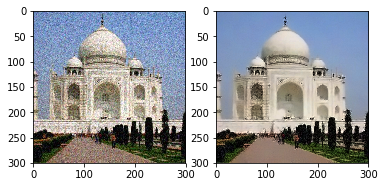

'\nu.showImage(img)\nu.showImage(dst)\n'

In [23]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
sys.path.append('../common/')
import bonghanUtil as u

img = cv.imread('taj-rgb-noise.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

'''
u.showImage(img)
u.showImage(dst)
'''

##### 2. cv.fastNlMeansDenoisingMulti()
이제 우리는 비디오에 같은 방법을 적용 할 것입니다. 첫 번째 인수는 시끄러운 프레임 목록입니다. 두 번째 인자 imgToDenoiseIndex는 우리가 입력리스트에 frame의 인덱스를 전달하기 위해 우리가 소멸해야하는 프레임을 지정합니다. 세 번째는 denoising에 사용할 인접 프레임 수를 지정하는 temporalWindowSize입니다. 이상해야합니다. 이 경우, 전체 temporalWindowSize 프레임은 중앙 프레임이 노이즈 제거 될 프레임 인 경우에 사용됩니다. 예를 들어 5 개의 프레임 목록을 입력으로 전달했습니다. imgToDenoiseIndex = 2 및 temporalWindowSize = 3이라고하면, frame-1, frame-2 및 frame-3은 frame-2를 제거하는 데 사용됩니다. 예를 보도록하겠습니다.

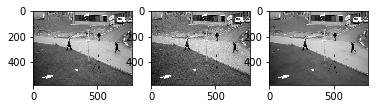

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
sys.path.append('../common/')
import bonghanUtil as u

cap = cv.VideoCapture('../data/vtest.avi')

# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]
# convert all to grayscale
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]
# convert all to float64
gray = [np.float64(i) for i in gray]
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = [i+noise for i in gray]
# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
# Denoise 3rd frame considering all the 5 frames
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 10, 7, 21)
plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()

u.saveImage('1.jpg', gray[2])
u.saveImage('1n.jpg', noisy[2])
u.saveImage('1d.jpg', dst)

It takes considerable amount of time for computation. In the result, first image is the original frame, second is the noisy one, third is the denoised image.

#### Additional Resources
1. http://www.ipol.im/pub/art/2011/bcm_nlm/ (It has the details, online demo etc. Highly recommended to visit. Our test image is generated from this link)
2. [Online course at coursera](https://www.coursera.org/learn/image-processing) (First image taken from here)
#### Exercises